In [2]:
import pandas as pd
import numpy as np
from scipy import ndimage
import imageio
from PIL import Image
from skimage.transform import resize
import cv2
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import os
import shutil

In [ ]:
# windows
path = os.getcwd()
#ruta="C:\\Users\\javie\\OneDrive\\Documentos\\Hacker\\Proyecto-Machine-Learning\\data\\raw_data\\raw"
#os.chdir(ruta)

In [5]:
RAW_IMAGE_PATH = os.getcwd() + '\\..\\data\\raw_data\\raw'
RESIZE_IMAGE_PATH = os.getcwd() +  '\\..\\data\\raw_data\\image_resize'
COMPRESSED_IMAGE_PATH = os.getcwd() +  '\\..\\data\\raw_data\\image_compressed'

In [50]:
def resize_data(path):
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        for file in os.listdir(folder_path):
            try:
                file_path = os.path.join(folder_path, file)
                img = cv2.imread(file_path)
                img = cv2.resize(img, (250, 250))
                name_arch = file.split(".")
                cv2.imwrite(f"{name_arch[0]}_resize.png", img)
                destination_path = os.path.join(RESIZE_IMAGE_PATH, folder)
                if not os.path.exists(destination_path):
                    os.makedirs(destination_path)
                    print("Create dir: ", destination_path)
                shutil.move(f"{name_arch[0]}_resize.png", destination_path)
            except Exception as e:
                print("Error: ",e)

In [51]:
resize_data(RAW_IMAGE_PATH)

Create dir:  c:\Users\javie\OneDrive\Documentos\Hacker\Proyect_ML\notebooks\..\data\raw_data\image_resize\dew
Create dir:  c:\Users\javie\OneDrive\Documentos\Hacker\Proyect_ML\notebooks\..\data\raw_data\image_resize\fogsmog
Error:  OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

Create dir:  c:\Users\javie\OneDrive\Documentos\Hacker\Proyect_ML\notebooks\..\data\raw_data\image_resize\frost
Create dir:  c:\Users\javie\OneDrive\Documentos\Hacker\Proyect_ML\notebooks\..\data\raw_data\image_resize\glaze
Create dir:  c:\Users\javie\OneDrive\Documentos\Hacker\Proyect_ML\notebooks\..\data\raw_data\image_resize\hail
Create dir:  c:\Users\javie\OneDrive\Documentos\Hacker\Proyect_ML\notebooks\..\data\raw_data\image_resize\lightning
Create dir:  c:\Users\javie\OneDrive\Documentos\Hacker\Proyect_ML\notebooks\..\data\raw_data\image_resize\rain
Create dir:  c:\Users\javie\OneDrive\Docume

In [72]:
def compressed_data(path):
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        print(folder_path)
        for file in os.listdir(folder_path):
            #try:
                file_path = os.path.join(folder_path, file)
                img = cv2.imread(file_path)
                img = cv2.resize(img, (50, 50))

                blue, green, red = cv2.split(img)
                # Initialize PCA with first 50 principal components
                pca = PCA(50)
                
                #Applying to red channel and then applying inverse transform to transformed array.
                red_transformed = pca.fit_transform(red)
                red_inverted = pca.inverse_transform(red_transformed)

                #Applying to Green channel and then applying inverse transform to transformed array.
                green_transformed = pca.fit_transform(green)
                green_inverted = pca.inverse_transform(green_transformed)
                
                #Applying to Blue channel and then applying inverse transform to transformed array.
                blue_transformed = pca.fit_transform(blue)
                blue_inverted = pca.inverse_transform(blue_transformed)

                img_compressed = (cv2.merge([red_inverted, green_inverted, blue_inverted])).astype(np.uint8)
                destination_path = os.path.join(COMPRESSED_IMAGE_PATH, folder)

                name_arch = file.split(".")
                cv2.imwrite(f"{name_arch[0]}_compressed.png", img_compressed)

                if not os.path.exists(destination_path):
                    os.makedirs(destination_path)
                shutil.move(f"{name_arch[0]}_compressed.png", destination_path)
                
            #except Exception as e:
            #    print("Error: ",e)

In [73]:
compressed_data(RESIZE_IMAGE_PATH)

c:\Users\javie\OneDrive\Documentos\Hacker\Proyect_ML\notebooks\..\data\raw_data\image_resize\dew
c:\Users\javie\OneDrive\Documentos\Hacker\Proyect_ML\notebooks\..\data\raw_data\image_resize\fogsmog
c:\Users\javie\OneDrive\Documentos\Hacker\Proyect_ML\notebooks\..\data\raw_data\image_resize\frost
c:\Users\javie\OneDrive\Documentos\Hacker\Proyect_ML\notebooks\..\data\raw_data\image_resize\glaze
c:\Users\javie\OneDrive\Documentos\Hacker\Proyect_ML\notebooks\..\data\raw_data\image_resize\hail
c:\Users\javie\OneDrive\Documentos\Hacker\Proyect_ML\notebooks\..\data\raw_data\image_resize\lightning
c:\Users\javie\OneDrive\Documentos\Hacker\Proyect_ML\notebooks\..\data\raw_data\image_resize\rain
c:\Users\javie\OneDrive\Documentos\Hacker\Proyect_ML\notebooks\..\data\raw_data\image_resize\rainbow
c:\Users\javie\OneDrive\Documentos\Hacker\Proyect_ML\notebooks\..\data\raw_data\image_resize\rime
c:\Users\javie\OneDrive\Documentos\Hacker\Proyect_ML\notebooks\..\data\raw_data\image_resize\sandstorm
c:\

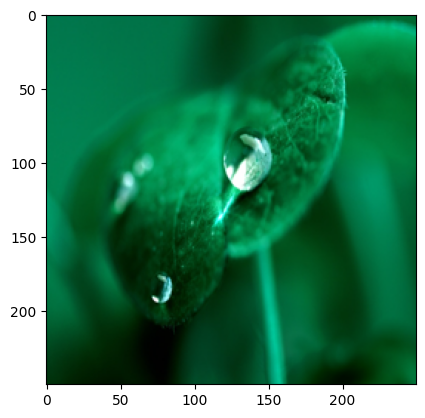

In [52]:
img = cv2.imread("C:\\Users\\javie\\OneDrive\\Documentos\Hacker\\Proyecto-Machine-Learning\\data\\raw_data\\image_resize\\dew\\2208_resize.png")
plt.imshow(img);

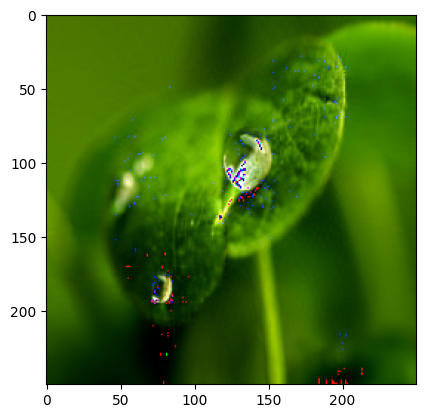

In [15]:
img = cv2.imread("C:\\Users\\javie\\OneDrive\\Documentos\Hacker\\Proyecto-Machine-Learning\\data\\raw_data\\image_compressed\\dew\\2208_resize_compressed.png")
plt.imshow(img);

In [6]:
def create_dataframe(path):
    dict_comp_flat_px = []
    names = []
    for name_rut in os.listdir(path):
        folder_path = os.path.join(path, name_rut)
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            img = cv2.imread(file_path)
            pix_val =np.array(img)
            name_arch = file.split(".")
            name_arch = name_arch[0].split("_")
            name_arch = name_arch[0]
            if len(pix_val.flatten()) == 7500 or pix_val.size == 7500:
                dict_comp_flat_px.append(pix_val.flatten())
                names.append(name_rut)
            else:
                print(pix_val.size)
                print(name_arch)
    df_comp = pd.DataFrame(dict_comp_flat_px, columns=np.arange(0,7500))
    df_comp["name_img"] = names

    df_comp = df_comp.sample(frac=1).reset_index(drop=True)

    return df_comp

In [7]:
df_comp = create_dataframe(COMPRESSED_IMAGE_PATH)
df_comp

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,name_img
0,124,96,10,145,142,30,164,141,19,176,...,146,168,106,20,57,14,67,126,48,dew
1,0,76,195,0,76,195,0,77,194,1,...,24,35,53,55,67,90,46,58,82,rime
2,165,167,163,165,171,174,190,199,200,158,...,72,78,61,71,76,60,67,76,60,glaze
3,139,98,68,136,95,65,150,105,71,146,...,106,81,56,103,74,51,106,78,54,sandstorm
4,17,18,17,109,101,150,40,37,61,49,...,139,176,204,139,176,204,129,162,215,rime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6855,250,206,117,249,205,116,250,206,117,250,...,217,149,80,198,142,80,192,138,61,sandstorm
6856,79,76,97,94,90,112,107,99,128,118,...,109,89,77,112,99,87,89,78,71,lightning
6857,52,83,143,51,82,141,50,81,140,48,...,109,113,128,143,148,158,102,111,129,rime
6858,241,243,218,245,248,231,241,244,217,252,...,41,120,0,64,148,0,85,169,1,dew


In [8]:
df_comp["name_img"].value_counts()

name_img
rime         1160
fogsmog       850
dew           698
sandstorm     692
glaze         639
snow          620
hail          591
rain          526
frost         475
lightning     377
rainbow       232
Name: count, dtype: int64

In [9]:
df_comp["name_img"].value_counts(normalize=True)

name_img
rime         0.169096
fogsmog      0.123907
dew          0.101749
sandstorm    0.100875
glaze        0.093149
snow         0.090379
hail         0.086152
rain         0.076676
frost        0.069242
lightning    0.054956
rainbow      0.033819
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Histograma distribución dataset')

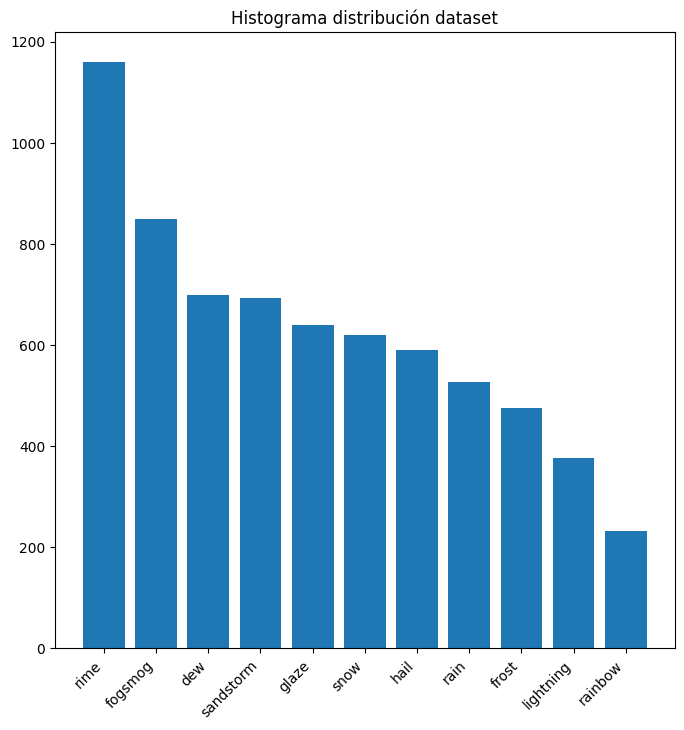

In [12]:
plt.figure(figsize=(8,8))
plt.bar(df_comp["name_img"].value_counts().index, height = df_comp["name_img"].value_counts().values);
plt.xticks(rotation=45, ha='right');
plt.title("Histograma distribución dataset")
#plt.savefig("..\\app\\src\img\\analitycs\\hist_dataset.png")

In [14]:
def feauture_engine(df):
    le = LabelEncoder()
    le.fit(df["name_img"])
    df["name_img_encode"] = le.transform(df["name_img"])

    return df

In [15]:
DATASETS_PATH = os.getcwd() + '\\..\\data\\datasets'

In [16]:
def create_train_test_csv(df):
    df_train_comp = df.iloc[0:5465,:]
    df_test_comp = df.iloc[5465:,:]

    df_train_comp.to_csv(f"{DATASETS_PATH}\\train_21.csv", sep=";")
    df_test_comp.to_csv(f"{DATASETS_PATH}\\test_21.csv", sep=";")


In [17]:
df_comp_encode = feauture_engine(df_comp)
df_comp_encode

,0,1,2,3,4,5,6,7,8,9,...,7492,7493,7494,7495,7496,7497,7498,7499,name_img,name_img_encode
0,124,96,10,145,142,30,164,141,19,176,...,168,106,20,57,14,67,126,48,dew,0
1,0,76,195,0,76,195,0,77,194,1,...,35,53,55,67,90,46,58,82,rime,8
2,165,167,163,165,171,174,190,199,200,158,...,78,61,71,76,60,67,76,60,glaze,3
3,139,98,68,136,95,65,150,105,71,146,...,81,56,103,74,51,106,78,54,sandstorm,9
4,17,18,17,109,101,150,40,37,61,49,...,176,204,139,176,204,129,162,215,rime,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6855,250,206,117,249,205,116,250,206,117,250,...,149,80,198,142,80,192,138,61,sandstorm,9
6856,79,76,97,94,90,112,107,99,128,118,...,89,77,112,99,87,89,78,71,lightning,5
6857,52,83,143,51,82,141,50,81,140,48,...,113,128,143,148,158,102,111,129,rime,8
6858,241,243,218,245,248,231,241,244,217,252,...,120,0,64,148,0,85,169,1,dew,0


In [18]:
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=15))
pca_pipe.fit(df_comp_encode.drop(columns="name_img").values)

modelo_pca = pca_pipe['pca']

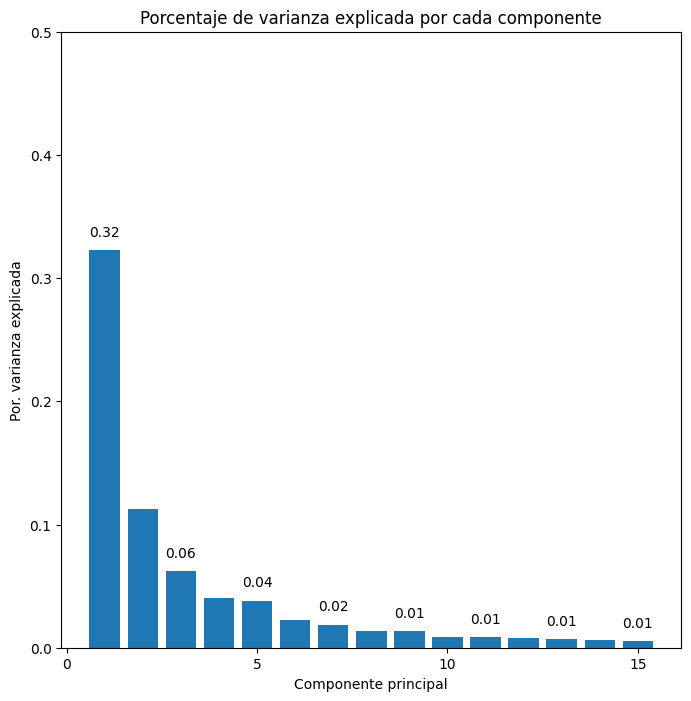

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)
i=2
for x, y in zip(np.arange(len(df_comp_encode.drop(columns="name_img").columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    if i%2==0:
        ax.annotate(
            label,
            (x,y),
            textcoords="offset points",
            xytext=(0,10),
            ha='center'
        )
    i += 1

xticks = np.arange(0, modelo_pca.n_components_ + 1, 5)

ax.set_xticks(xticks)
ax.set_yticks(np.arange(0,0.6,0.1))
ax.set_ylim(0, 0.5)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');
plt.savefig("..\\app\\src\\img\\analytics\\pac_varianza_comp.png")

In [21]:
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=50))
pca_pipe.fit(df_comp_encode.drop(columns="name_img").values)

modelo_pca = pca_pipe['pca']

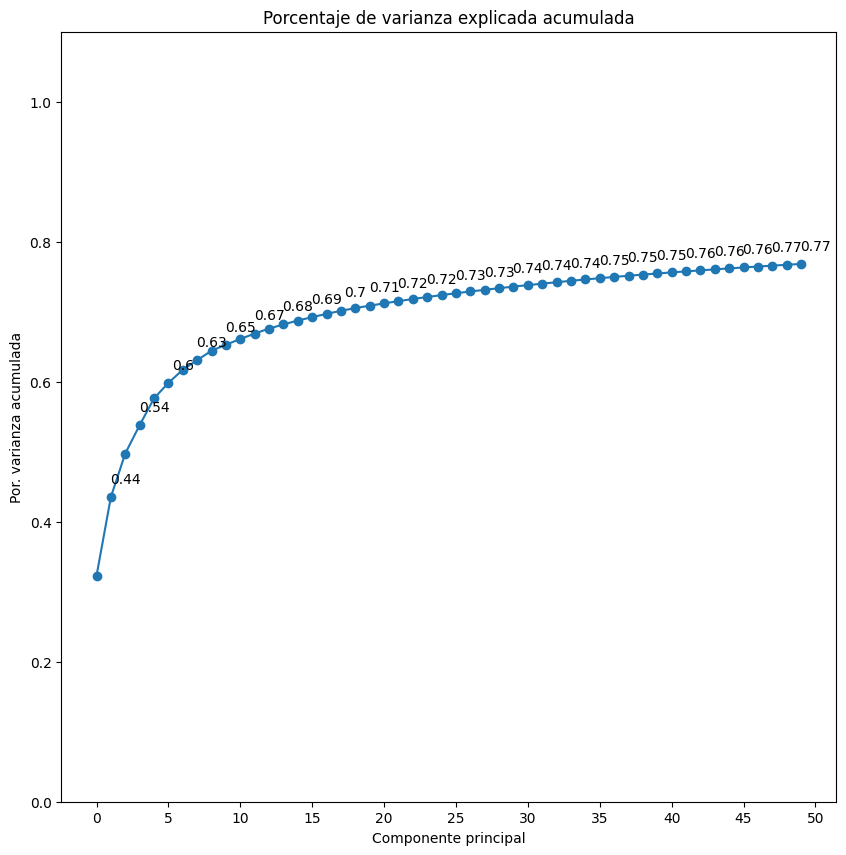

In [22]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(
    np.arange(50) ,
    prop_varianza_acum,
    marker = 'o'
)
i = 1
for x, y in zip(np.arange(len(df_comp_encode.drop(columns="name_img").columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    if i%2==0:
        ax.annotate(
            label,
            (x,y),
            textcoords="offset points",
            xytext=(0,10),
            ha='center'
        )
    i +=1
    
ax.set_ylim(0, 1.1)
xticks = np.arange(0, modelo_pca.n_components_ + 1, 5)
ax.set_xticks(xticks)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');
plt.savefig("..\\app\\src\img\\analytics\\pac_varianza_acum.png")

In [106]:
create_train_test_csv(df_comp_encode)

In [93]:
MAIN_PATH = os.getcwd() 

In [3]:
df_train = pd.read_csv("..\\data\\datasets\\train.csv", sep=";")
df_test = pd.read_csv("..\\data\\datasets\\test.csv", sep=";")

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5465 entries, 0 to 5464
Columns: 7502 entries, Unnamed: 0 to name_img
dtypes: int64(7501), object(1)
memory usage: 312.8+ MB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Columns: 7502 entries, Unnamed: 0 to name_img
dtypes: int64(7501), object(1)
memory usage: 80.0+ MB


In [6]:
df_train["name_img"].value_counts(normalize=True)

name_img
rime         0.175114
fogsmog      0.120586
sandstorm    0.101006
dew          0.100823
glaze        0.093321
snow         0.089478
hail         0.083623
rain         0.076670
frost        0.069716
lightning    0.057274
rainbow      0.032388
Name: proportion, dtype: float64

In [7]:
df_test["name_img"].value_counts(normalize=True)

name_img
rime         0.145311
fogsmog      0.137437
dew          0.105225
sandstorm    0.100215
hail         0.095920
snow         0.094488
glaze        0.092341
rain         0.076593
frost        0.067287
lightning    0.045812
rainbow      0.039370
Name: proportion, dtype: float64

In [8]:
df_train.drop(columns="Unnamed: 0", inplace=True)
df_test.drop(columns="Unnamed: 0", inplace=True)

In [10]:
le = LabelEncoder()
le.fit(df_train["name_img"])
df_train["name_img_encode"] = le.transform(df_train["name_img"])

In [11]:
df_train["name_img_encode"].value_counts()

name_img_encode
8     957
1     659
9     552
0     551
3     510
10    489
4     457
6     419
2     381
5     313
7     177
Name: count, dtype: int64

In [12]:
df_train["name_img_encode"].value_counts(normalize=True)

name_img_encode
8     0.175114
1     0.120586
9     0.101006
0     0.100823
3     0.093321
10    0.089478
4     0.083623
6     0.076670
2     0.069716
5     0.057274
7     0.032388
Name: proportion, dtype: float64

In [13]:
le = LabelEncoder()
le.fit(df_test["name_img"])
df_test["name_img_encode"] = le.transform(df_test["name_img"])

In [14]:
df_test["name_img_encode"].value_counts(normalize=True)

name_img_encode
8     0.145311
1     0.137437
0     0.105225
9     0.100215
4     0.095920
10    0.094488
3     0.092341
6     0.076593
2     0.067287
5     0.045812
7     0.039370
Name: proportion, dtype: float64

In [19]:
df_train.to_csv("..\\data\\datasets\\train.csv", sep=";")

In [20]:
df_test.to_csv("..\\data\\datasets\\test.csv", sep=";")